**CAR DAMAGE DETECTION**


AIM : To detect whether the car has damage or not


Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


Loading the train and test dataset
*   Resizing, as each image is different
*   As the images in the dataset have different sizes, the first step is to  resize the images to 150x150

In [6]:
train_datagen = ImageDataGenerator(rescale =1/255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CarDamage_Dataset/training',
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1840 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale =1/255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CarDamage_Dataset/testing',
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 460 images belonging to 2 classes.


Building the Model - CNN
The model is built using the tensorflow framework

In [8]:
#initializing 
cnn = tf.keras.models.Sequential()


In [9]:
#convolutional layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu',input_shape=[150,150,3]))


In [10]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
#flattening
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [14]:
#output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [15]:
#compiling
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
#fitting the model
history = cnn.fit(x=training_set, validation_data=testing_set, epochs=20)

Epoch 1/20
58/58 [==============================] - 653s 11s/step - loss: 0.6875 - accuracy: 0.5832 - val_loss: 0.5883 - val_accuracy: 0.6935
Epoch 2/20
58/58 [==============================] - 69s 1s/step - loss: 0.5754 - accuracy: 0.6967 - val_loss: 0.5253 - val_accuracy: 0.7500
Epoch 3/20
58/58 [==============================] - 70s 1s/step - loss: 0.5413 - accuracy: 0.7429 - val_loss: 0.5697 - val_accuracy: 0.7196
Epoch 4/20
58/58 [==============================] - 69s 1s/step - loss: 0.4838 - accuracy: 0.7750 - val_loss: 0.4982 - val_accuracy: 0.7609
Epoch 5/20
58/58 [==============================] - 69s 1s/step - loss: 0.4735 - accuracy: 0.7821 - val_loss: 0.5365 - val_accuracy: 0.7261
Epoch 6/20
58/58 [==============================] - 73s 1s/step - loss: 0.4267 - accuracy: 0.8016 - val_loss: 0.4928 - val_accuracy: 0.7652
Epoch 7/20
58/58 [==============================] - 70s 1s/step - loss: 0.4261 - accuracy: 0.8092 - val_loss: 0.5054 - val_accuracy: 0.7565
Epoch 8/20
58/58 [

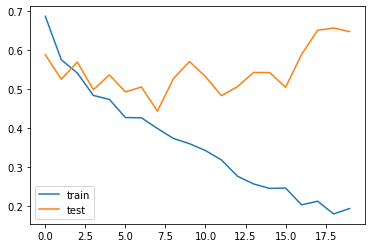

In [17]:
#plotting the train and test error 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [33]:
# model prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CarDamage_Dataset/Validation/image_1_val.jpg',target_size=(150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)

training_set.class_indices

if result[0][0]==0:
  prediction = 'car damaged'
else:
  prediction = 'car not damaged'


In [34]:
print(prediction)

car damaged


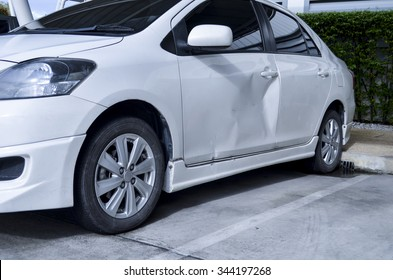

In [35]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/CarDamage_Dataset/Validation/image_1_val.jpg'))

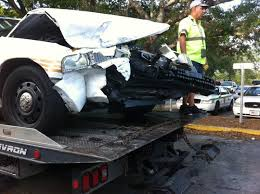

In [44]:

display(Image('/content/drive/MyDrive/CarDamage_Dataset/testing/damage/0069.JPEG'))

In [45]:
#validation dataset
val_image = image.load_img('/content/drive/MyDrive/CarDamage_Dataset/testing/damage/0069.JPEG',target_size=(150,150))
val_image = image.img_to_array(val_image)
val_image = np.expand_dims(val_image,axis=0)
result1 = cnn.predict(val_image)

training_set.class_indices

if result1[0][0]==0:
  prediction1 = 'damage'
else:
  prediction1 = 'no damage'

In [46]:
print(prediction1)

damage


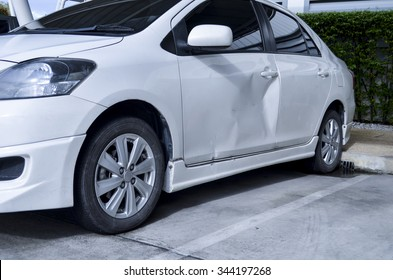

In [24]:
display(Image('/content/drive/MyDrive/CarDamage_Dataset/Validation/image_1_val.jpg'))